In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd '/content/drive/MyDrive/Minería-Datos/Tarea3-Python'
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

/content/drive/MyDrive/Minería-Datos/Tarea3-Python


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Ver nombre de las columnas
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
#Renombrar nombres de las columnas
df_iris.columns = ['Id','SepalLength','SepalWidth','PetalLength','PetalWidth','Species']

In [5]:
#Eliminar columna 'Id'
df_iris= df_iris.drop(['Id'], axis=1)

In [6]:
#Agregar nueva columna
df_iris['Class_num'] = np.nan

In [7]:
#Creación de método
def agregarNumClase(df):
  df_ = pd.DataFrame(df)
  for i in df.index:
    if df_['Species'].iloc[i] == "Iris-setosa":
      df_['Class_num'] = 0
    elif df['Species'].iloc[i] == "Iris-versicolor":
      df_['Class_num'].iloc[i] = 1
    else:
      df_['Class_num'].iloc[i] = 2
  return df_
#Llamada del método
df_iris = agregarNumClase(df_iris)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Class_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
#Creación de métodos
def centroides(df,k):
  df_ = pd.DataFrame(df)
  cant_registros = df.shape[0]
  numero_columnas = df.shape[1]

  centroides = np.ones([k,4])

  for i in range(k):
    for j in range(4):
      #minimo = np.array(df_.iloc[:,j]).min()
      #maximo = np.array(df_.iloc[:,j]).max()
      #minimo = minimo.astype(np.float16)
      #maximo = maximo.astype(np.float16)
      minimo = round(min(df_.iloc[:,j]))
      maximo = round(max(df_.iloc[:,j]))
      centroides[i,j] = np.random.randint(minimo,maximo+1,1)
  return centroides
#Llamada al método
matriz_centroides = centroides(df_iris,3)

In [10]:
matriz_centroides

array([[5., 3., 5., 0.],
       [8., 2., 7., 1.],
       [7., 3., 3., 2.]])

In [11]:
#Creación de métodos
def calcularDistancias(df,Centroides):
  Num_registros = df.shape[0]
  K = Centroides.shape[0]
  Distancias = np.empty((Num_registros,K))

  for i in df.index:
    registro = np.array(df.iloc[i,0:4])
    for j in range(K):
      VectorDiferencia = registro - Centroides[j,:]
      DiferenciaCuadrada = np.dot(VectorDiferencia,VectorDiferencia)
      Distancias[i,j] = DiferenciaCuadrada
  return Distancias
#Llamada al método
matriz_distancias = calcularDistancias(df_iris,matriz_centroides)

In [12]:
matriz_distancias

array([[13.26, 42.66,  9.66],
       [13.01, 42.61, 10.21],
       [13.86, 45.46, 11.46],
       [12.46, 43.66, 11.26],
       [13.36, 43.56, 10.16],
       [12.02, 38.82,  7.62],
       [13.37, 45.37, 11.37],
       [12.45, 41.85,  9.65],
       [13.37, 45.77, 12.57],
       [12.28, 41.88, 10.28],
       [12.94, 40.54,  8.54],
       [11.8 , 42.  , 10.2 ],
       [13.01, 43.41, 11.01],
       [15.71, 50.31, 14.51],
       [16.12, 43.12,  8.92],
       [14.86, 41.66,  8.46],
       [14.82, 43.22,  8.82],
       [13.31, 42.51,  9.31],
       [12.11, 37.11,  6.91],
       [12.99, 42.39,  9.39],
       [11.25, 37.45,  7.65],
       [12.91, 41.91,  8.91],
       [16.56, 50.76, 13.36],
       [11.24, 38.44,  7.64],
       [ 9.85, 38.85,  9.45],
       [11.6 , 39.8 ,  9.2 ],
       [11.88, 40.48,  8.68],
       [12.58, 40.98,  8.98],
       [13.2 , 41.8 ,  9.2 ],
       [11.73, 42.13, 10.53],
       [11.65, 41.25, 10.05],
       [12.73, 39.33,  7.53],
       [13.51, 43.31, 10.31],
       [14

In [13]:
#Creación de método
def asignacionCentroides(MDistancias,df):
  df_ = pd.DataFrame(df)
  num_registros = df_.shape[0]
  vector_centroides = np.empty(num_registros)
  df_['Cluster_num'] = np.nan

  for i in df_.index:
    registro = np.array(MDistancias[i,:])
    valor_minimo = registro.min()
    index_valor_minimo = np.where(registro == valor_minimo)[0]
    vector_centroides[i] = index_valor_minimo[0]
    df_.loc[i,'Cluster_num'] = index_valor_minimo[0]

  return vector_centroides, df_ 

#Llamada al método
centroides_asignados, df_iris =  asignacionCentroides(matriz_distancias,df_iris)

In [14]:
centroides_asignados

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 2., 0., 2., 0., 0., 2., 0., 0., 2., 2., 0., 0.,
       2., 0., 0., 2., 0., 0., 2., 2., 2., 2., 0., 2., 0., 0., 2., 0., 0.,
       2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 2., 2., 1., 0., 2., 2., 0., 1., 1.,
       0., 1., 0., 1., 2., 1., 1., 2., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       2., 0., 2., 2., 1., 2., 0., 1., 1., 2., 2., 2., 2., 0.])

In [15]:
#Creacion del método
def recalcularCentroides(df):
  centroides = np.zeros((3,4))
  K = 3
  for i in range(K):
    map = df['Cluster_num'] == i
    df_clase = df[map]
    vector_medias = np.array(df_clase.iloc[:,0:4].mean())
    centroides[i,:] = vector_medias
  
  return centroides
  

In [16]:
continuar = True
contador = 0

while continuar == True:
  #Recalcular Centroides
  matriz_centroides = recalcularCentroides(df_iris)
  #Obtener Nuevas distancias
  matriz_distancias = calcularDistancias(df_iris,matriz_centroides)
  #Asignación de centroides a cada registro
  centroides_asignados2 = centroides_asignados
  centroides_asignados, df_iris = asignacionCentroides(matriz_distancias,df_iris)
  #Comparar las asignaciones anteriores de centroides con las nuevas
  #Modificar variable 'continuar'
  if list(centroides_asignados) == list(centroides_asignados2):
    continuar = False
  #Conocer números de ciclos realizados
  contador += 1

**Gráficas:**

In [17]:
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Class_num,Cluster_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0,2.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,2.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,2.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,2.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,2.0


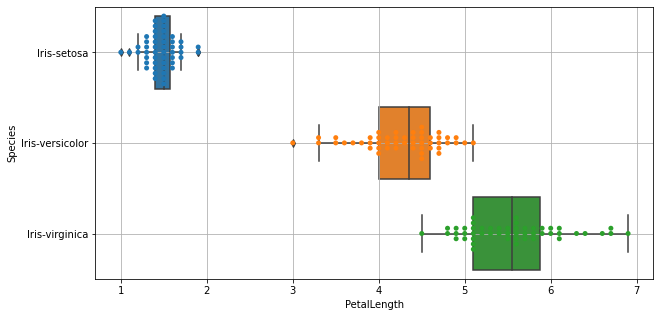

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_iris, x='PetalLength', y='Species', dodge=True )
sns.swarmplot(data=df_iris, x='PetalLength',y='Species', dodge=True)
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


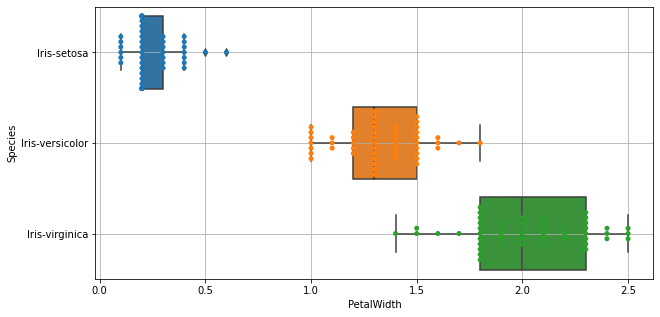

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_iris, x='PetalWidth', y='Species', dodge=True )
sns.swarmplot(data=df_iris, x='PetalWidth',y='Species', dodge=True)
plt.grid()

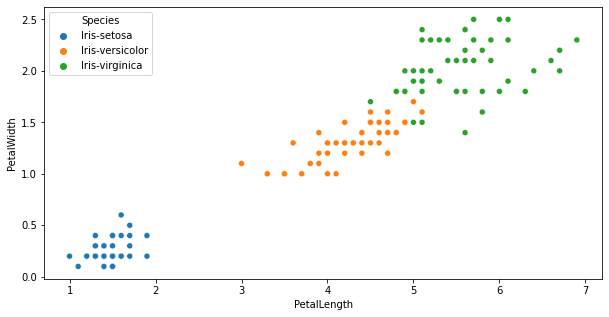

In [20]:
#Ground thruth
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_iris, x='PetalLength', y='PetalWidth', hue='Species')
plt.show()

In [ ]:
df_iris['Class-Cluster'] = np.nan
for i in df_iris.index:
  if df_iris['Cluster_num'][i] == 2:
    df_iris['Class-Cluster'][i] = 'Iris-setosa'
  elif df_iris['Cluster_num'][i] == 0:
    df_iris['Class-Cluster'][i] = 'Iris-versicolor'
  else:
    df_iris['Class-Cluster'][i] = 'Iris-virginica'


In [22]:
df_iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Class_num,Cluster_num,Class-Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0,2.0,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,2.0,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,2.0,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,2.0,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,2.0,Iris-setosa
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,1.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0.0,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica,2,1.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,2,1.0,Iris-virginica


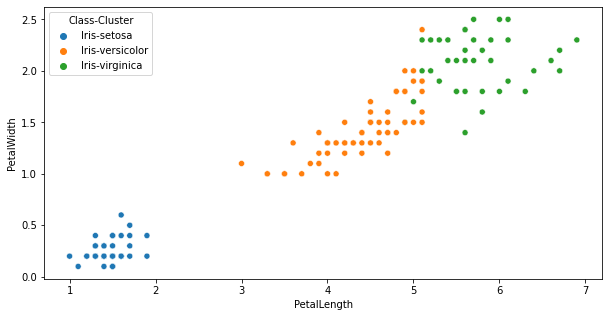

In [23]:
#Predicción
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_iris, x='PetalLength', y='PetalWidth', hue='Class-Cluster')
plt.show()

In [26]:
centroides_asignados

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.])

In [24]:
matriz_centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [25]:
matriz_distancias

array([[1.16912747e+01, 2.55989612e+01, 2.15920000e-02],
       [1.15503070e+01, 2.61626454e+01, 1.91992000e-01],
       [1.27403070e+01, 2.78715928e+01, 1.69992000e-01],
       [1.17128876e+01, 2.65594875e+01, 2.69192000e-01],
       [1.20219199e+01, 2.60542244e+01, 3.91920000e-02],
       [9.90191988e+00, 2.19163296e+01, 4.67592000e-01],
       [1.23657908e+01, 2.71594875e+01, 1.72392000e-01],
       [1.11325650e+01, 2.50252770e+01, 3.59200000e-03],
       [1.27615973e+01, 2.83873823e+01, 6.41592000e-01],
       [1.12786941e+01, 2.56836981e+01, 1.34392000e-01],
       [1.10522425e+01, 2.39910665e+01, 2.37992000e-01],
       [1.09645005e+01, 2.49668560e+01, 6.31920000e-02],
       [1.20174037e+01, 2.69468560e+01, 2.41992000e-01],
       [1.52551457e+01, 3.19421191e+01, 8.26392000e-01],
       [1.32980489e+01, 2.60921191e+01, 1.04079200e+00],
       [1.22099844e+01, 2.38694875e+01, 1.47159200e+00],
       [1.22167586e+01, 2.53100139e+01, 4.38792000e-01],
       [1.14545005e+01, 2.52347